#### import modules

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew

import os

#### import train and test data

In [3]:
train = pd.read_csv("./train.csv")
test  = pd.read_csv("./test.csv")

In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#Id feature can be dropped
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [7]:
#outlier detection???

mu = 180921.20 sigma = 79415.29


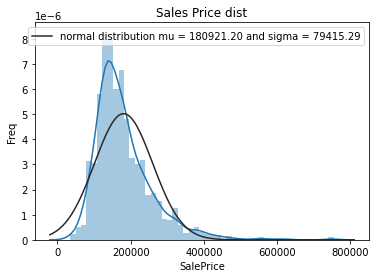

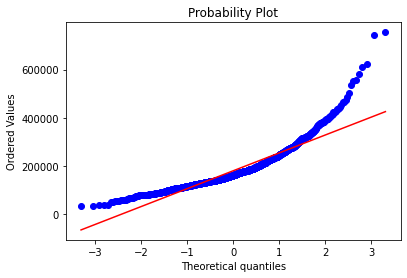

In [8]:
sns.distplot(train['SalePrice'],fit=norm)

(mu,sigma) = norm.fit(train['SalePrice'])
print("mu = {:.2f} sigma = {:.2f}".format(mu,sigma))

plt.legend(['normal distribution mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('Freq')
plt.title('Sales Price dist')

fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [9]:
#log transformation
train['SalePrice'] =np.log1p(train['SalePrice'])


mu = 12.02 sigma = 0.40


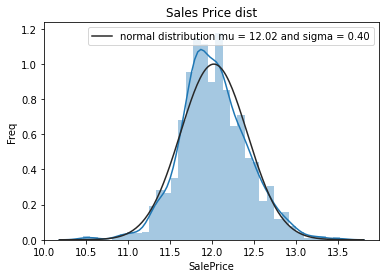

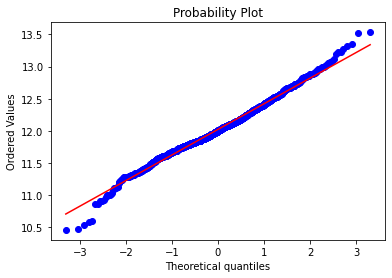

In [10]:
sns.distplot(train['SalePrice'],fit=norm)

(mu,sigma) = norm.fit(train['SalePrice'])
print("mu = {:.2f} sigma = {:.2f}".format(mu,sigma))

plt.legend(['normal distribution mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('Freq')
plt.title('Sales Price dist')

fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [59]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)


In [60]:
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [61]:
print(len(all_data))
all_data_na = (all_data.isnull().sum() / len(all_data)) *100
print(all_data_na)

2919
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
Length: 79, dtype: float64


In [62]:
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)

In [63]:
all_data_na.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF'],
      dtype='object')

Text(0.5, 1.0, 'Percent missing data by feature')

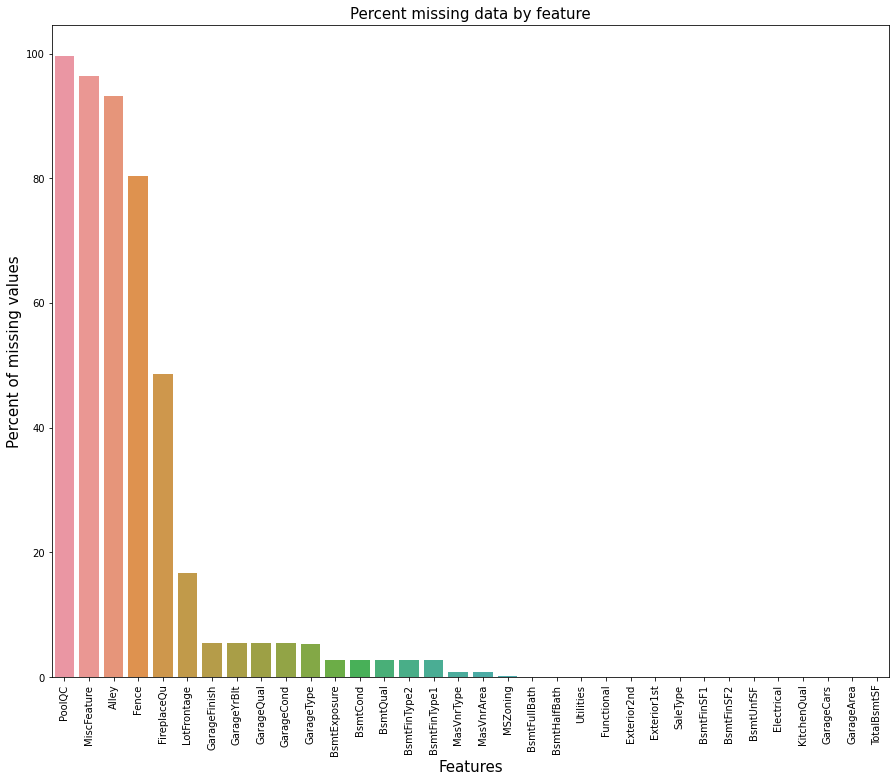

In [64]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

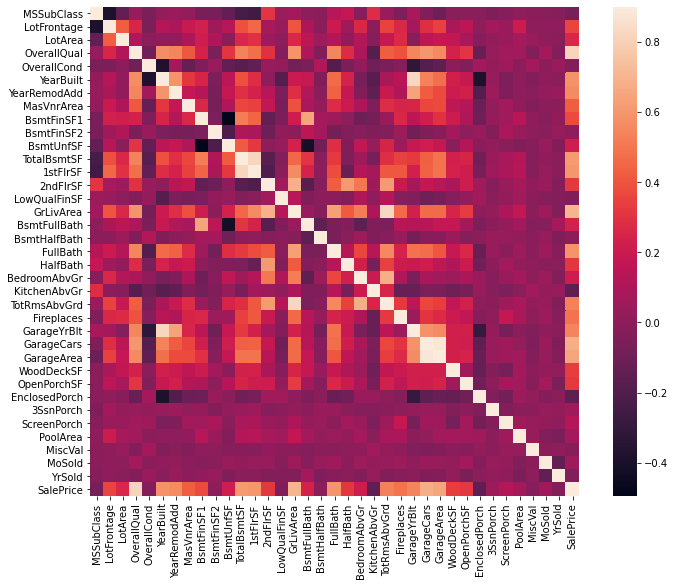

In [65]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True);

In [66]:
#data description says NA means "No  Pool". 
#That make sense, given the huge ratio of missing value (+99%) and majority of houses have
#no Pool at all in general. 
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [67]:
# data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [68]:
#data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")

In [69]:
# data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")

In [70]:
# data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [71]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [72]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [73]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [74]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [75]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [76]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [77]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [78]:
#For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
#Since the house with 'NoSewa' is in the training set, this feature won't help 
#in predictive modelling. We can then safely remove it.
all_data.groupby("Utilities").size()

Utilities
AllPub    2916
NoSeWa       1
dtype: int64

In [79]:
all_data = all_data.drop(['Utilities'], axis=1)

In [80]:
# data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [81]:
# It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [82]:
# Only one NA value, and same as Electrical, we set 'TA' 
# (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [83]:
# Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [84]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [85]:
# all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [86]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

In [87]:
all_data_na

Series([], dtype: float64)

In [88]:
all_data.groupby('MSZoning').size()

MSZoning
C (all)      25
FV          139
RH           26
RL         2269
RM          460
dtype: int64

In [89]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [ ]:
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [91]:
 all_data['Alley']

0       None
1       None
2       None
3       None
4       None
        ... 
2914    None
2915    None
2916    None
2917    None
2918    None
Name: Alley, Length: 2919, dtype: object

In [92]:
all_data.shape

(2919, 78)

In [93]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [94]:
 all_data['Alley']

0       1
1       1
2       1
3       1
4       1
       ..
2914    1
2915    1
2916    1
2917    1
2918    1
Name: Alley, Length: 2919, dtype: int64

In [95]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [96]:
all_data.shape

(2919, 79)

In [97]:
# Skewed features??

In [98]:
# get dummy categorical features
all_data = pd.get_dummies(all_data)

In [99]:
all_data.shape

(2919, 221)

In [100]:
# new train and test
train = all_data[:ntrain]
test = all_data[ntrain:]

#### Modelling

In [106]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb


In [115]:

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [118]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("score:",score)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score: [0.10753398 0.1495919  0.13173708 0.10802364 0.18880341]

Lasso score: 0.1371 (0.0303)



In [119]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("score:",score)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score: [0.10761076 0.14901863 0.13221868 0.10822968 0.18851957]
ElasticNet score: 0.1371 (0.0300)



In [120]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("score:",score)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/home/jaswant/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.18846e-19): result may not be accurate.
  overwrite_a=False)
/home/jaswant/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.75359e-18): result may not be accurate.
  overwrite_a=False)
/home/jaswant/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.29845e-19): result may not be accurate.
  overwrite_a=False)
/home/jaswant/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.68097e-19): result may not be accurate.
  overwrite_a=False)


score: [1.33265869 0.57290391 0.783153   0.41163165 1.00292907]
Kernel Ridge score: 0.8207 (0.3242)



/home/jaswant/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.82552e-19): result may not be accurate.
  overwrite_a=False)


In [121]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("score:",score)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score: [0.11146805 0.14125238 0.12482757 0.10855726 0.13153389]
Gradient Boosting score: 0.1235 (0.0122)

